## Observations and Insights 

# Observations

1. After performing the an overview of all the tests and statistical analyses, the Capomulin and Ramicane regimens appear to be the most promising treatments. On average, they reduced tumor volume by a sizable amount more than the placebo and did so consistently judging by the standard deviations.

2. The bar charts showing observations for each regimen suggests that the mice that underwent the Capomulin and Ramicane lived longer. This is because further digging showed that each regimen had 25 test subject mice (except one regimen which had 24) and hence the longer each mice lived, the more observations of tumor volume our researchers could collect. On the other hand, the Propriva treatment appeared to perform even worse than the placebo and may in fact be harmful. Further research into it is suggested.

3. According to the line chart of Tumor Volume Over Time for Mouse b128, the data collected heavily suggests the Capomulin treatment is effective at reducing tumor volume over time in mice. More tests should be run to ensure its viability and checking other Capomulin mice's tumor volume over time might prove fruitful. Moreover, the scatterplots and linear regression suggest a strong positive relationship between tumor volume and mouse weight in mice treated with Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined_with_duplicates_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_combined_with_duplicates_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_combined_with_duplicates_df['Mouse ID'].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_combined_clean_df = mouse_combined_with_duplicates_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_combined_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_combined_clean_df['Mouse ID'].count()

1888

## Summary Statistics

In [7]:
mouse_combined_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Use groupby to categorize data by drug regimen
grouped_regimen_df = mouse_combined_clean_df.groupby(['Drug Regimen'])

# Calculate and round mean of tumor volume
tumor_volume_mean = round(grouped_regimen_df["Tumor Volume (mm3)"].mean(),3)

# Calculate and round median of tumor volume
tumor_volume_median = round(grouped_regimen_df["Tumor Volume (mm3)"].median(),3)

# Calculate and round variance of tumor volume
tumor_volume_variance = round(grouped_regimen_df["Tumor Volume (mm3)"].var(),3)

# Calculate and round standard deviation of tumor volume
tumor_volume_stdev = round(grouped_regimen_df["Tumor Volume (mm3)"].std(),3)

# Calculate and round standard error of means of tumor volume
tumor_volume_sem = round(grouped_regimen_df["Tumor Volume (mm3)"].sem(),3)

# Display information in new summary data table
regimen_summary_table_df = pd.DataFrame({"Mean of Tumor Volume (mm3)": tumor_volume_mean,
                                         "Median of Tumor Volume (mm3)": tumor_volume_median,
                                         "Variance of Tumor Volume": tumor_volume_variance,
                                         "St. Dev. of Tumor Volume": tumor_volume_stdev,
                                         "SEM of Tumor Volume": tumor_volume_sem})

# Display summary data table
regimen_summary_table_df

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume,St. Dev. of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.393,50.910,43.139,6.568,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
round(grouped_regimen_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}), 3)

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.393  50.910  43.139  6.568  0.526
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

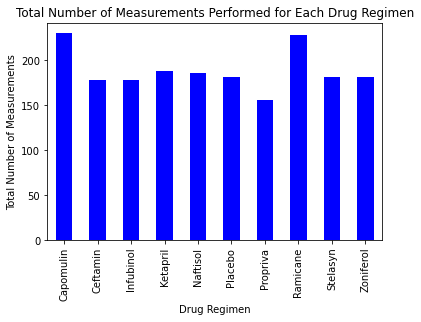

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Calculate number of measurements taken for each drug regimen
count_measurements = grouped_regimen_df["Timepoint"].count()

# Create bar chart using pandas
count_measurements_chart = count_measurements.plot(kind='bar', color='blue')

# Set the title, x-label, and y-label
count_measurements_chart.set_title("Total Number of Measurements Performed for Each Drug Regimen")
count_measurements_chart.set_xlabel("Drug Regimen")
count_measurements_chart.set_ylabel("Total Number of Measurements")

# Show chart and give it tight layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Total Number of Measurements')

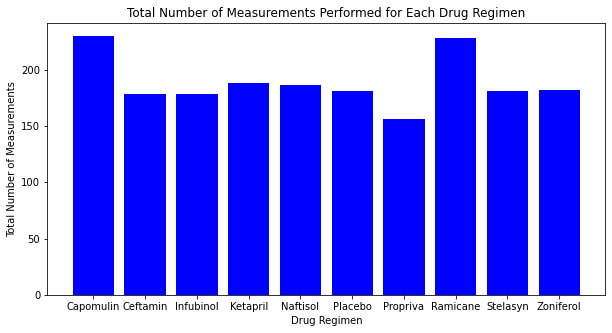

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# List of drug regimens to be used for x-axis
regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",
           "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

# Count measurements data found earlier
count_measurements

# Set size of chart figure
plt.figure(figsize=(10,5))

# Create bar chart using pyplot
plt.bar(regimen, count_measurements, color='b', align="center")

# Set the title, x-label, and y-label
plt.title("Total Number of Measurements Performed for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

In [12]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


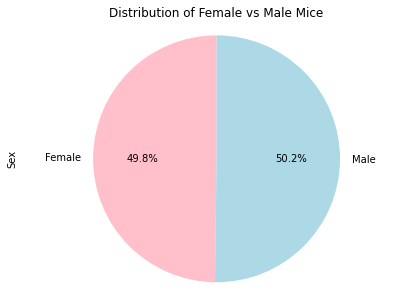

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Calculate number of mice of each gender
grouped_gender_metadata_df = mouse_metadata.groupby(['Sex'])
count_gender = grouped_gender_metadata_df['Sex'].count()

# Create pie chart using pandas
count_gender_chart = count_gender.plot(kind='pie', startangle=90, figsize=(7,5), autopct='%1.1f%%', colors=['pink', 'lightblue'])

# Set the title
count_gender_chart.set_title("Distribution of Female vs Male Mice")

# Show chart and give it tight layout
plt.axis('equal')
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

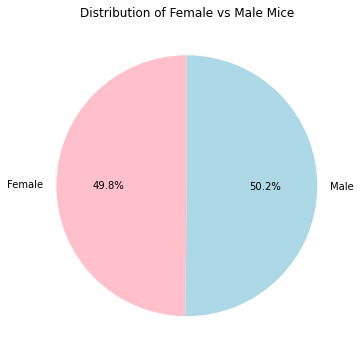

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# List of genders to be used
genders = ["Female", "Male"]

# Count genders data found earlier
count_gender

# Set size of chart figure
plt.figure(figsize=(6,6))

# Create pie chart using pyplot
plt.pie(count_gender, labels=genders, startangle=90, autopct='%1.1f%%', colors=['pink', 'lightblue'])

# Set the title
plt.title("Distribution of Female vs Male Mice")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# List of desired regimens
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
# Sort study_results data by highest timepoints to lowest timepoints
timepoints_sorted = study_results.sort_values(by='Timepoint', ascending=False)

# Drop duplicate Mouse IDs and keep first time a Mouse ID appears
last_timepoint_study_results = timepoints_sorted.drop_duplicates(subset='Mouse ID', keep='first')
#last_timepoint_study_results

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_combined_final_timepoints_df = pd.merge(last_timepoint_study_results, mouse_metadata, on="Mouse ID")

# Filter dataframe to only mice that underwent target regimens
target_regimen_final_timepoints_df = mouse_combined_final_timepoints_df[mouse_combined_final_timepoints_df['Drug Regimen'].isin(target_regimens)]
target_regimen_final_timepoints_df.reset_index(drop=True, inplace=True)
target_regimen_final_timepoints_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,s508,45,30.276232,0,Ramicane,Male,1,17
1,y793,45,31.896238,2,Capomulin,Male,17,17
2,z578,45,30.638696,0,Ramicane,Male,11,16
3,m957,45,33.329098,1,Capomulin,Female,3,19
4,e662,45,40.659006,2,Ramicane,Male,8,24
...,...,...,...,...,...,...,...,...
95,c326,5,36.321346,0,Infubinol,Female,18,25
96,x226,0,45.000000,0,Ceftamin,Male,23,28
97,b447,0,45.000000,0,Ceftamin,Male,2,30
98,t573,0,45.000000,0,Ceftamin,Female,15,27


In [16]:
# Dataframe of last timepoints of only capomulin mice
capomulin_final_timepoints_df = target_regimen_final_timepoints_df[target_regimen_final_timepoints_df["Drug Regimen"] == "Capomulin"]
capomulin_final_timepoints_df.reset_index(drop=True, inplace=True)
#capomulin_final_timepoints_df

# Calculate upper and lower quartiles, median, and IQR
capomulin_quartiles = capomulin_final_timepoints_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

# Print upper and lower quartiles, median, and IQR
print(f"The upper quartile tumor volume after the capomulin regimen is: {capomulin_upperq}")
print(f"The the median of tumor volume after the capomulin regimen is: {capomulin_quartiles[0.5]} ")
print(f"The lower quartile tumor volume after the capomulin regimen is: {capomulin_lowerq}")
print(f"The interquartile range of tumor volume after the capomulin regimen is: {capomulin_iqr}")

# Calculate upper and lower bounds
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)

# Print upper and lower bounds
print(f"Values above {capomulin_upper_bound} could be outliers.")
print(f"Values below {capomulin_lower_bound} could be outliers.")

# Identify outliers of capomulin mice
capomulin_outliers = capomulin_final_timepoints_df.loc[(capomulin_final_timepoints_df['Tumor Volume (mm3)'] < capomulin_lower_bound) | (capomulin_final_timepoints_df['Tumor Volume (mm3)'] > capomulin_upper_bound)]
capomulin_outliers

The upper quartile tumor volume after the capomulin regimen is: 40.1592203
The the median of tumor volume after the capomulin regimen is: 38.125164399999996 
The lower quartile tumor volume after the capomulin regimen is: 32.37735684
The interquartile range of tumor volume after the capomulin regimen is: 7.781863460000004
Values above 51.83201549 could be outliers.
Values below 20.70456164999999 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [17]:
# Dataframe of last timepoints of only ramicane mice
ramicane_final_timepoints_df = target_regimen_final_timepoints_df[target_regimen_final_timepoints_df["Drug Regimen"] == "Ramicane"]
ramicane_final_timepoints_df.reset_index(drop=True, inplace=True)
#ramicane_final_timepoints_df

# Calculate upper and lower quartiles, median, and IQR
ramicane_quartiles = ramicane_final_timepoints_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

# Print upper and lower quartiles, median, and IQR
print(f"The upper quartile tumor volume after the ramicane regimen is: {ramicane_upperq}")
print(f"The the median of tumor volume after the ramicane regimen is: {ramicane_quartiles[0.5]} ")
print(f"The lower quartile tumor volume after the ramicane regimen is: {ramicane_lowerq}")
print(f"The interquartile range of tumor volume after the ramicane regimen is: {ramicane_iqr}")

# Calculate upper and lower bounds
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)

# Print upper and lower bounds
print(f"Values above {ramicane_upper_bound} could be outliers.")
print(f"Values below {ramicane_lower_bound} could be outliers.")

# Identify outliers of ramicane mice
ramicane_outliers = ramicane_final_timepoints_df.loc[(ramicane_final_timepoints_df['Tumor Volume (mm3)'] < ramicane_lower_bound) | (ramicane_final_timepoints_df['Tumor Volume (mm3)'] > ramicane_upper_bound)]
ramicane_outliers

The upper quartile tumor volume after the ramicane regimen is: 40.65900627
The the median of tumor volume after the ramicane regimen is: 36.56165229 
The lower quartile tumor volume after the ramicane regimen is: 31.56046955
The interquartile range of tumor volume after the ramicane regimen is: 9.098536719999998
Values above 54.30681135 could be outliers.
Values below 17.912664470000003 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [18]:
# Dataframe of last timepoints of only infubinol mice
infubinol_final_timepoints_df = target_regimen_final_timepoints_df[target_regimen_final_timepoints_df["Drug Regimen"] == "Infubinol"]
infubinol_final_timepoints_df.reset_index(drop=True, inplace=True)
infubinol_final_timepoints_df

# Calculate upper and lower quartiles, median, and IQR
infubinol_quartiles = infubinol_final_timepoints_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

# Print upper and lower quartiles, median, and IQR
print(f"The upper quartile tumor volume after the infubinol regimen is: {infubinol_upperq}")
print(f"The the median of tumor volume after the infubinol regimen is: {infubinol_quartiles[0.5]} ")
print(f"The lower quartile tumor volume after the infubinol regimen is: {infubinol_lowerq}")
print(f"The interquartile range of tumor volume after the infubinol regimen is: {infubinol_iqr}")

# Calculate upper and lower bounds
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)

# Print upper and lower bounds
print(f"Values above {infubinol_upper_bound} could be outliers.")
print(f"Values below {infubinol_lower_bound} could be outliers.")

# Identify outliers of infubinol mice
infubinol_outliers = infubinol_final_timepoints_df.loc[(infubinol_final_timepoints_df['Tumor Volume (mm3)'] < infubinol_lower_bound) | (infubinol_final_timepoints_df['Tumor Volume (mm3)'] > infubinol_upper_bound)]
infubinol_outliers

The upper quartile tumor volume after the infubinol regimen is: 65.52574285
The the median of tumor volume after the infubinol regimen is: 60.16518046 
The lower quartile tumor volume after the infubinol regimen is: 54.04860769
The interquartile range of tumor volume after the infubinol regimen is: 11.477135160000003
Values above 82.74144559000001 could be outliers.
Values below 36.83290494999999 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
24,c326,5,36.321346,0,Infubinol,Female,18,25


In [19]:
# Dataframe of last timepoints of only ceftamin mice
ceftamin_final_timepoints_df = target_regimen_final_timepoints_df[target_regimen_final_timepoints_df["Drug Regimen"] == "Ceftamin"]
ceftamin_final_timepoints_df.reset_index(drop=True, inplace=True)
#ceftamin_final_timepoints_df

# Calculate upper and lower quartiles, median, and IQR
ceftamin_quartiles = ceftamin_final_timepoints_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

# Print upper and lower quartiles, median, and IQR
print(f"The upper quartile tumor volume after the ceftamin regimen is: {ceftamin_upperq}")
print(f"The the median of tumor volume after the ceftamin regimen is: {ceftamin_quartiles[0.5]} ")
print(f"The lower quartile tumor volume after the ceftamin regimen is: {ceftamin_lowerq}")
print(f"The interquartile range of tumor volume after the ceftamin regimen is: {ceftamin_iqr}")

# Calculate upper and lower bounds
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)

# Print upper and lower bounds
print(f"Values above {ceftamin_upper_bound} could be outliers.")
print(f"Values below {ceftamin_lower_bound} could be outliers.")

# Identify outliers of ceftamin mice
ceftamin_outliers = ceftamin_final_timepoints_df.loc[(ceftamin_final_timepoints_df['Tumor Volume (mm3)'] < ceftamin_lower_bound) | (ceftamin_final_timepoints_df['Tumor Volume (mm3)'] > ceftamin_upper_bound)]
ceftamin_outliers

The upper quartile tumor volume after the ceftamin regimen is: 64.29983003
The the median of tumor volume after the ceftamin regimen is: 59.85195552 
The lower quartile tumor volume after the ceftamin regimen is: 48.72207785
The interquartile range of tumor volume after the ceftamin regimen is: 15.577752179999997
Values above 87.66645829999999 could be outliers.
Values below 25.355449580000002 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [20]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

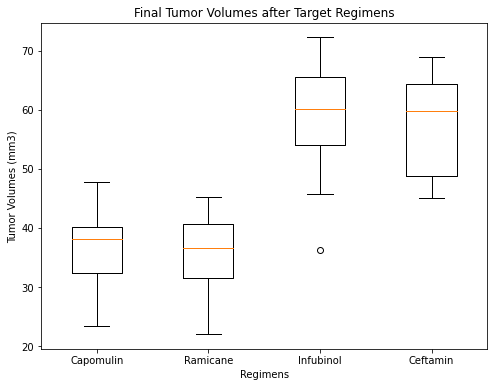

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Turn panda's series of target regimen tumor volumes into python lists of final tumor volumes
capomulin_tumor_volumes_list = capomulin_final_timepoints_df['Tumor Volume (mm3)'].tolist()
ramicane_tumor_volumes_list = ramicane_final_timepoints_df['Tumor Volume (mm3)'].tolist()
infubinol_tumor_volumes_list = infubinol_final_timepoints_df['Tumor Volume (mm3)'].tolist()
ceftamin_tumor_volumes_list = ceftamin_final_timepoints_df['Tumor Volume (mm3)'].tolist()

# Create list of lists of final tumor volumes
target_regimen_final_tumor_volume = [capomulin_tumor_volumes_list,
                                     ramicane_tumor_volumes_list,
                                     infubinol_tumor_volumes_list,
                                     ceftamin_tumor_volumes_list]

# Create figure
fig1, ax1 = plt.subplots(figsize=(8,6));

# Create boxplots
ax1.boxplot(target_regimen_final_tumor_volume, labels=target_regimens);

# Set chart title and labels
ax1.set_title('Final Tumor Volumes after Target Regimens');
ax1.set_xlabel('Regimens');
ax1.set_ylabel('Tumor Volumes (mm3)');

## Line and Scatter Plots

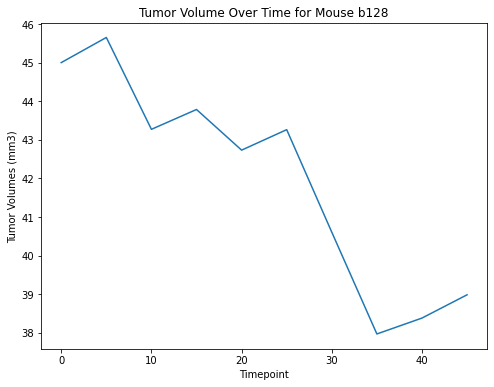

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Declare mouse ID of target mouse
target_mouse_id = 'b128'

# Filter data so that only target mouse data shows
target_mouse_data_df = mouse_combined_clean_df[mouse_combined_clean_df['Mouse ID'] == target_mouse_id]

# Convert target mouse's tumor volume and timepoints series to list
target_mouse_tumor_volume_list = target_mouse_data_df['Tumor Volume (mm3)'].tolist()
target_mouse_timepoint_list = target_mouse_data_df['Timepoint'].tolist()

# Create figure
fig1, ax1 = plt.subplots(figsize=(8,6));

# Create boxplots
ax1.plot(target_mouse_timepoint_list, target_mouse_tumor_volume_list);

# Set chart title and labels
ax1.set_title('Tumor Volume Over Time for Mouse ' + target_mouse_id);
ax1.set_xlabel('Timepoint');
ax1.set_ylabel('Tumor Volumes (mm3)');

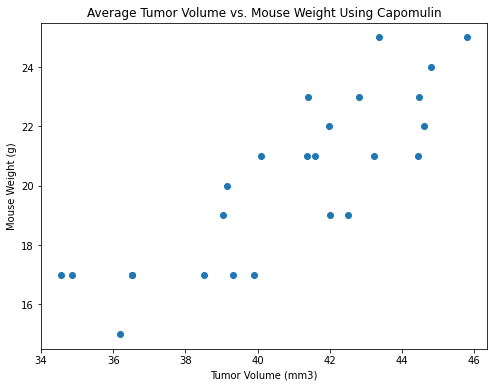

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Declare target regimen
target_regimen = 'Capomulin'

# Filter data so that only target regimen data shows
target_regimen_data_df = mouse_combined_clean_df[mouse_combined_clean_df['Drug Regimen'] == target_regimen]
target_regimen_data_df.reset_index(drop=True, inplace=True)

# Groupby mouse ID
capomulin_grouped_df = target_regimen_data_df.groupby(['Mouse ID'])

# Find each mouse's average tumor volume
capomulin_tumor_volume_means = capomulin_grouped_df['Tumor Volume (mm3)'].mean()

# Find each mouse's average weight (this is formality since weights stay the same)
capomulin_mouse_weights = capomulin_grouped_df['Weight (g)'].mean()

# Create and set figure size
fig1, ax1 = plt.subplots(figsize=(8,6));

# Create scatterplot
ax1.scatter(capomulin_tumor_volume_means, capomulin_mouse_weights);

# Set chart title and labels
ax1.set_title('Average Tumor Volume vs. Mouse Weight Using Capomulin');
ax1.set_xlabel('Tumor Volume (mm3)');
ax1.set_ylabel('Mouse Weight (g)');

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation between average tumor volume and mouse weight using data used for the scatterplot.
correlation = st.pearsonr(capomulin_tumor_volume_means, capomulin_mouse_weights)
print(f"The correlation between Tumor Volume (mm3) and Mouse Weight (g) is {round(correlation[0],2)}")

The correlation between Tumor Volume (mm3) and Mouse Weight (g) is 0.84


Regression Equation: y = 0.74x + -10.15


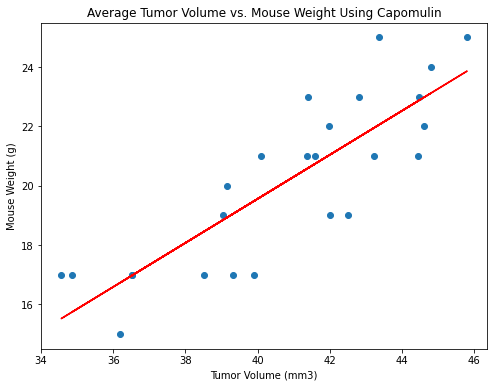

In [25]:
# Use scipy.stats to calculate linear regression between average tumor volume and mouse weights under the capomulin regimen
slope, intercept, r, p, se = st.linregress(capomulin_tumor_volume_means, capomulin_mouse_weights)

# Equation of the line for linear regression
lin_regression = capomulin_tumor_volume_means * slope + intercept

# Create and set figure size
fig1, ax1 = plt.subplots(figsize=(8,6));

# Create scatterplot
ax1.scatter(capomulin_tumor_volume_means, capomulin_mouse_weights);

# Add linear regression
ax1.plot(capomulin_tumor_volume_means, lin_regression, 'r')

# Print equation of the line for linear regression
print(f"Regression Equation: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

# Set chart title and labels
ax1.set_title('Average Tumor Volume vs. Mouse Weight Using Capomulin');
ax1.set_xlabel('Tumor Volume (mm3)');
ax1.set_ylabel('Mouse Weight (g)');